In [200]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import math

precise = 0.4
a =  -2*np.pi 
b =  2*np.pi 

#Фурье преобразование
def FourierTransform(func):
  arr = [func(i) for i in np.arange(a,b,precise)]
  newArr = []
  N = len(arr)
  for k in range(len(arr)):
    row = [ arr[n]*np.exp(-2j*np.pi * k * n / N)  for n in range(N)]
    newArr.append(np.sum(row))
  return newArr

#Обратное Фурье преобразование
def OriginalTransform(arr):
  newArr = []
  N = len(arr)
  for k in range(len(arr)):
    row = [arr[n]*np.exp(2j*np.pi * k * n / N)  for n in range(N)]
    newArr.append(np.sum(row)*1/N)
  return newArr

#Сравнение 
def compare(func , name):
  plt.title(name)
  arr= FourierTransform(func)
  arr2 = np.fft.fft([func(i) for i in np.arange(a,b,precise)])
  axis = np.arange(a,b,precise) 
  plt.plot( axis , np.abs(arr),'r-')
  plt.plot( axis , np.abs(arr2) , 'b--')
  plt.grid(True)
  plt.show()
  

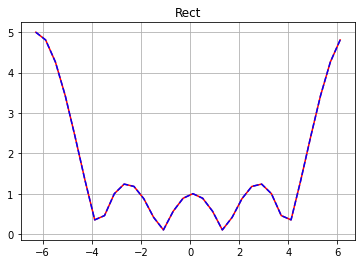

In [201]:
def rect(begin,end):
  def rect_(x):
    return 0 if x<begin or x>end else 1
  return rect_


compare(rect(-1,1) , 'Rect')
#совпадают

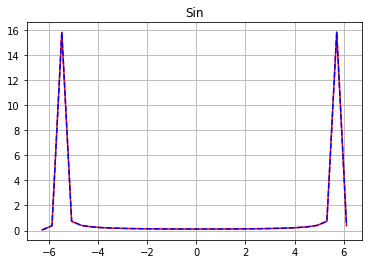

In [202]:
compare(np.sin , 'Sin')
#совпадают

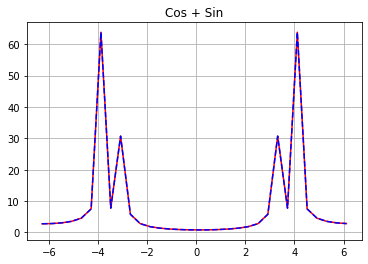

In [203]:
def harmonic(a,w1,b,w2):
  def harmonic_(x):
    return (a*np.cos(x*w1) + b*np.sin(x*w2))
  return harmonic_

compare(harmonic(4,3,-2,4) , 'Cos + Sin')
#совпадают

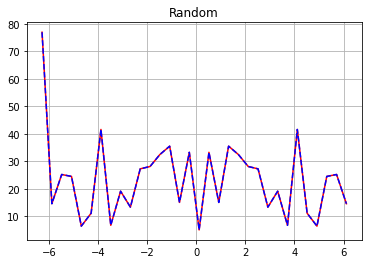

In [204]:
#Сравнение для случайных
def compare_rand(func , name):
  plt.title(name)
  r = random.random()
  random.seed(r)
  arr= FourierTransform(func)
  random.seed(r)
  arr2 = np.fft.fft([func(i) for i in np.arange(a,b,precise)])
  axis = np.arange(a,b,precise) 
  plt.plot( axis , np.abs(arr),'r-')
  plt.plot( axis , np.abs(arr2) , 'b--')
  plt.grid(True)
  plt.show()

def rand(x):
  return random.randint(math.floor(a),math.floor(b))



compare_rand(rand , 'Random')
#совпадают